# Linear Regression
1. Create random data
2. Fit a line to a series of points
3. Calculate the error

### Why is this useful?
* Predicting continous variables is commonplace in data science
* The results are easily interpretable
* A deeper dive into Linear Regression helps us to understand Logistic Regression
* Linear Regression is **super fast**
* Linear Regression can be **customized** to solve many other ML problems
* Prerequisite for understanding neural nets

In [115]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## 1. Create Random Data

In [116]:
N = 100  # number of points

In [117]:
np.random.seed(42)

In [118]:
x = np.random.randint(0, 100, size=N)

In [119]:
x.dtype, x.shape

(dtype('int64'), (100,))

In [120]:
x[:10]

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

**Q: what do the parameters mean?**

In [121]:
y_true = 2 * x + 10  # numpy saves us from writing a for loop

In [122]:
# add noise
noise = np.random.normal(loc=0.0, scale=50.0, size=N)  # mean and stdev of a normal distribution
y = y_true + noise

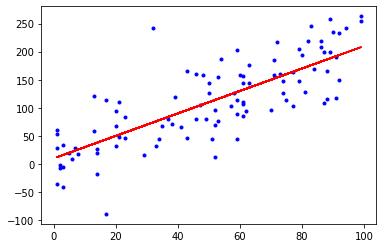

In [123]:
# plot the result
plt.plot(x, y, 'b.')  # <-- string with 2 chars, 1st: color; 2nd symbol
plt.plot(x, y_true, 'r-')

In [64]:
3 * x[:10] + 1000

array([1153, 1276, 1042, 1213, 1180, 1060, 1246, 1258, 1222, 1222])

## 2. Fit a line to the points

$\hat y = aX + b$

$\hat y = f(x_1, x_2, x_3)$

$\hat y = a_1x_1 + a_2x_2 + a_3x_3 + b$

* $\hat y$ is the estimated quantity, a vector of size N
* a is a vector of coefficients $a1, a2, a3$
* b is a single scalar for the intercept
* $x_n$ is a vector with the size N
* X is a (N, M) matrix containing all features times data points


**Two alternative ways to calculate a Linear Model**

### 1. Closed-form solution

Analytical solution using the **Normal Equation**

**Problems:**

* can only be solved if your features are not redundant!
* time needed grows with $M^2$ and $N^2$

### 2. Trial and error: Gradient Descent

Iterative approach, similar to the prep course.

For each iteration: 

* calculate the MSE error
* Change the parameters of the model
* Minimise the error using Gradient Descent

In [65]:
X = pd.DataFrame(x)  # translate my vector x to a Matrix X

**Compare the shapes of X and x**

In [66]:
x.shape, X.shape  # Series/vector  , DataFrame/matrix

((10,), (10, 1))


#### Fit a linear regression model to the data


In [67]:
m = LinearRegression()

In [68]:
m.fit(X, y)  # <-- runs Gradient Descent algorithm

LinearRegression()

**Q: did we find the original coefficients?**

In [69]:
m.coef_, m.intercept_

(array([2.41869067]), -34.53412108351668)

In [70]:
# make predictions
ypred = m.predict(X)

In [71]:
# this is the same as
ypred2 = 2.010776 * x + 12.4854

# or

ypred3 = m.coef_[0] * x + m.intercept_

In [72]:
ypred[:3], ypred2[:3], ypred3[:3]

(array([ 88.81910325, 187.98542085,  -0.67245166]),
 array([115.034976, 197.476792,  40.636264]),
 array([ 88.81910325, 187.98542085,  -0.67245166]))

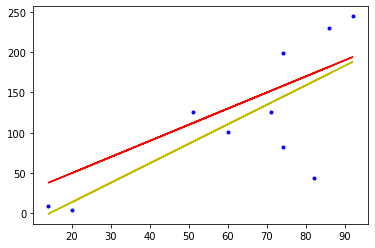

In [73]:
# plot the predictions
plt.plot(x, y, 'b.')
plt.plot(x, ypred, 'y-')
plt.plot(x, y_true, 'r-')

## 3. Calculate the error

### R squared

* the proportion of variance explained by the line of best fit
* Varies between 0 and 1
* 0 = no explainability from the model's correlation.
* 1 = the model has total explainability the proportion of variance that the model explains
* The higher the score, the better the model

### MSE:

* It is very sensitve to outliers - each residual is squared, so..
* residuals greater than one have a disproportionate big effect on outliers... 
* residuals less than one have a disproportionate small effect on outliers... 

### Alternatives:

* MAE - average of the absolute residuals. (less sensitive to outliers than the MSE)
* RMSLE - root-mean squared log error (doesn't penalise over-estimates as much as underestimates)

In [ ]:
# y_true = 1.0, 10, 100, 1000
# y_pred = 1.1,  9,  90, 1100

In [55]:
# R-squared
m.score(X, y)

0.5899476253767523

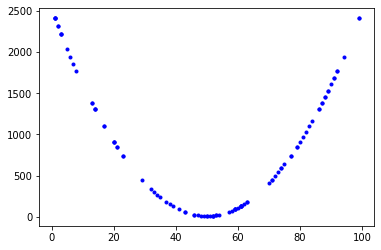

In [85]:
y = (x-50)**2 + 10  # numpy saves us from writing a for loop

plt.plot(x, y, 'b.')

In [111]:
# feature engineering
X = pd.DataFrame(x)
X['square'] = x ** 2
X['3rd'] = x ** 3
X['4th'] = x ** 4

In [112]:
m.fit(X, y)
m.coef_, m.intercept_

(array([-1.00000000e+02,  1.00000000e+00,  3.97373107e-14, -1.11022302e-16]),
 2509.999999995429)

In [113]:
ypred = m.predict(X)

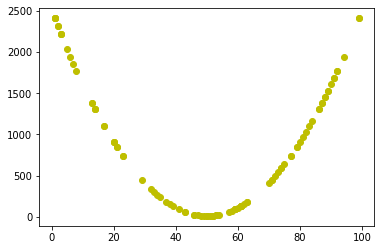

In [114]:
plt.plot(x, y, 'b.')
plt.plot(x, ypred, 'yo')